In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [2]:
# Specify the path to your downloaded image
#image_path = 'D:\\owd1\\Documents\\GitHub-REPO\\Senior-project\\Docs\\Row_Data\\makkah_ALL_BANDS\\Sentinel2_Full_Image_AOI_Float.tif'

image_path = "D:\\Users\\owd1\\Downloads\\Band4_and_Band8_Export.tif"


In [4]:
# Open the image
ds = gdal.Open(image_path)


In [5]:
# Get raster size
x_size = ds.RasterXSize
y_size = ds.RasterYSize
print(f"Size: {x_size} x {y_size}")


Size: 6445 x 6345


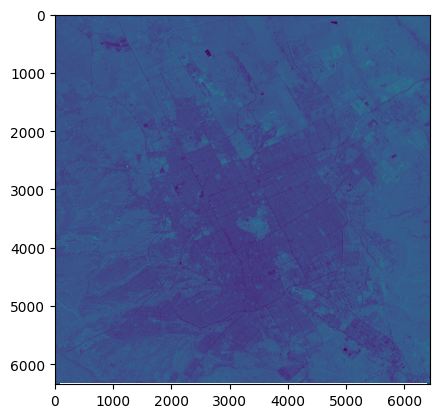

In [8]:
band = ds.GetRasterBand(2)
array = band.ReadAsArray()
plt.figure()
plt.imshow(array)

In [9]:
num_bands = ds.RasterCount
num_bands

2

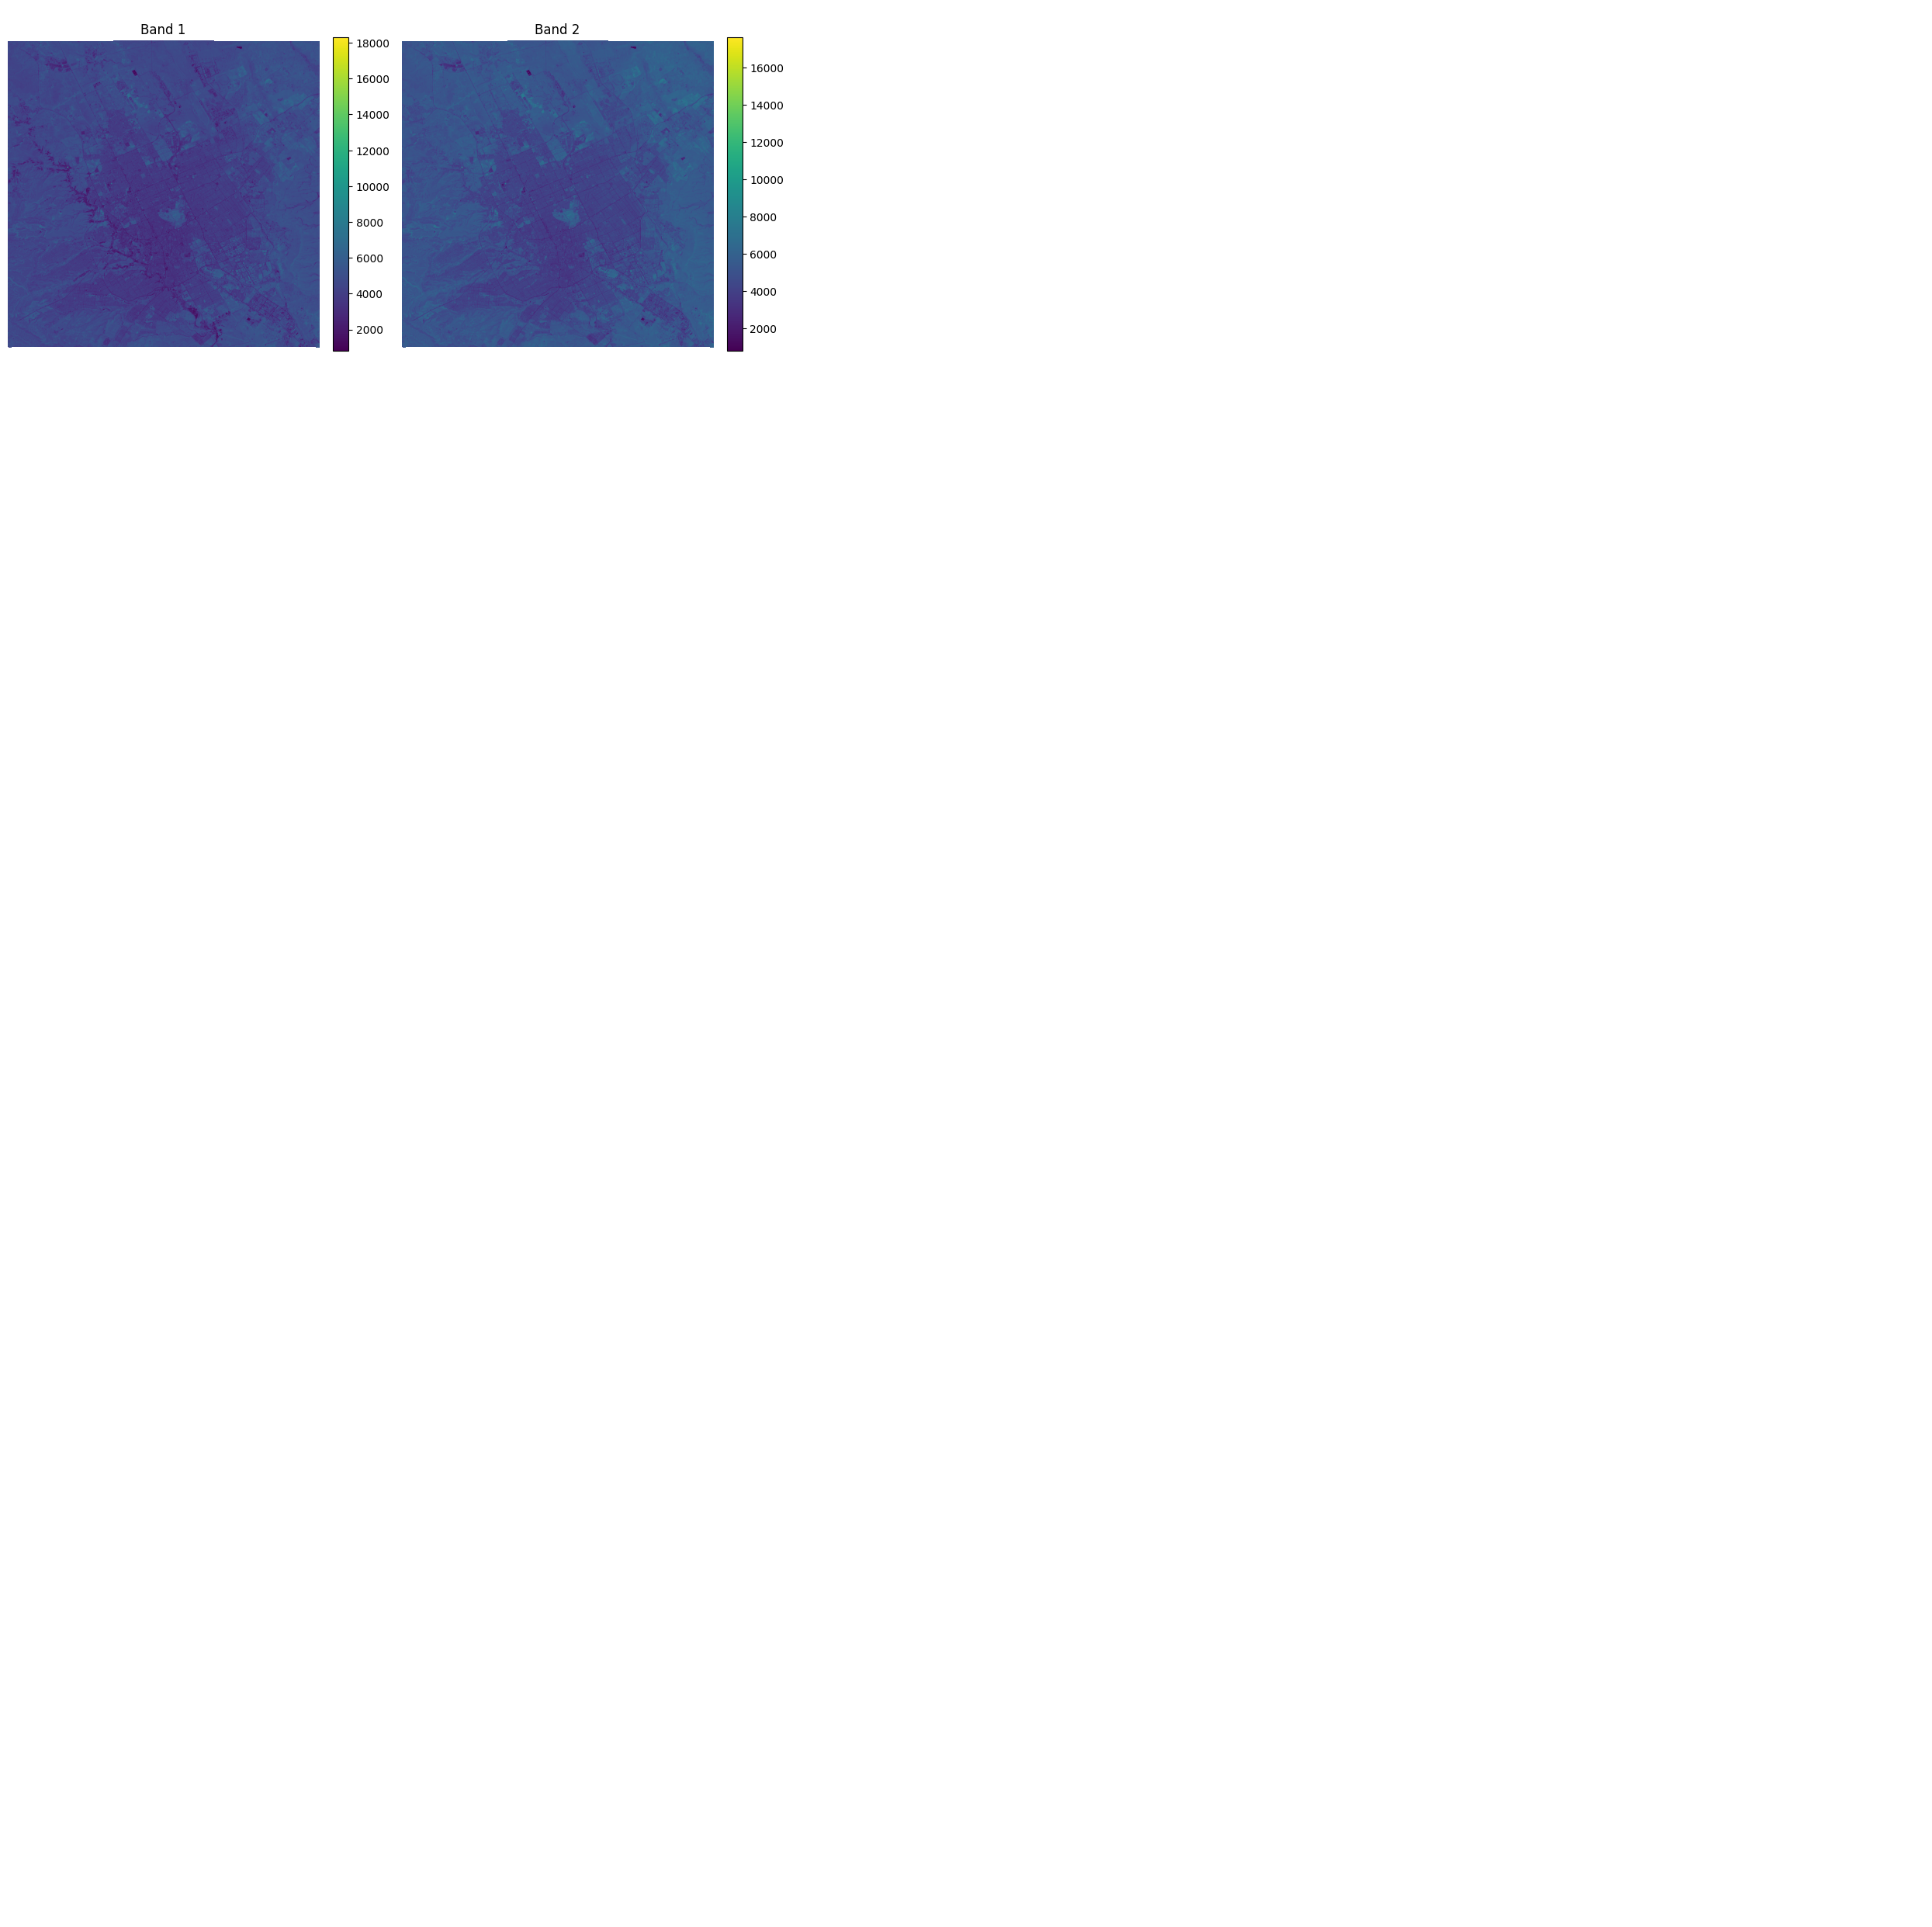

In [10]:
# Set up the plot with a 5x5 grid
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 25))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i in range(num_bands):  # Ensure num_bands is set to 23
    band = ds.GetRasterBand(i + 1)  # Bands are 1-indexed in GDAL
    array = band.ReadAsArray()

    ax = axes[i]
    im = ax.imshow(array)
    ax.set_title(f'Band {i + 1}')
    ax.axis('off')

    # Optionally, you can add a colorbar for each subplot
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# If you want to hide the unused axes:
for j in range(num_bands, 25):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

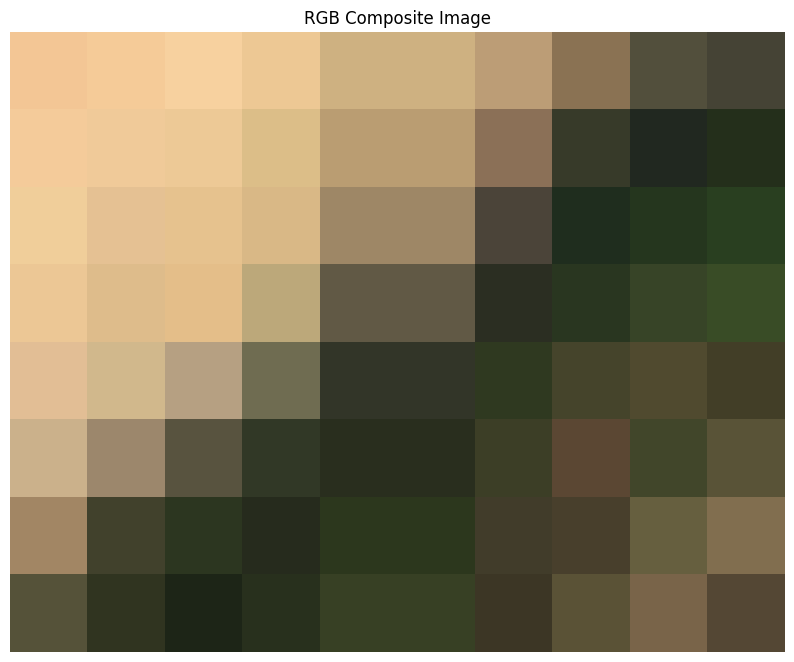

In [9]:
# Function to normalize array based on a given min and max value for display
def manual_normalize(array, min_val, max_val):
    array = np.clip(array, min_val, max_val)  # Clip to the specified range
    return (array - min_val) / (max_val - min_val)  # Normalize to [0, 1]

# Get bands for Red, Green, and Blue
band_red = ds.GetRasterBand(4).ReadAsArray()
band_green = ds.GetRasterBand(3).ReadAsArray()
band_blue = ds.GetRasterBand(2).ReadAsArray()

# Manually set the min and max values for display range based on histogram inspection or domain knowledge
min_display_val = 1000  # Example value, adjust based on your data
max_display_val = 3000  # Example value, adjust based on your data

# Normalize bands with the manually set display range
n_band_red = manual_normalize(band_red, min_display_val, max_display_val)
n_band_green = manual_normalize(band_green, min_display_val, max_display_val)
n_band_blue = manual_normalize(band_blue, min_display_val, max_display_val)

# Stack bands
rgb = np.dstack((n_band_red, n_band_green, n_band_blue))

# Plotting
plt.figure(figsize=(10, 10))
plt.imshow(rgb)
plt.title('RGB Composite Image')
plt.axis('off')  # Turn off the axis
plt.show()

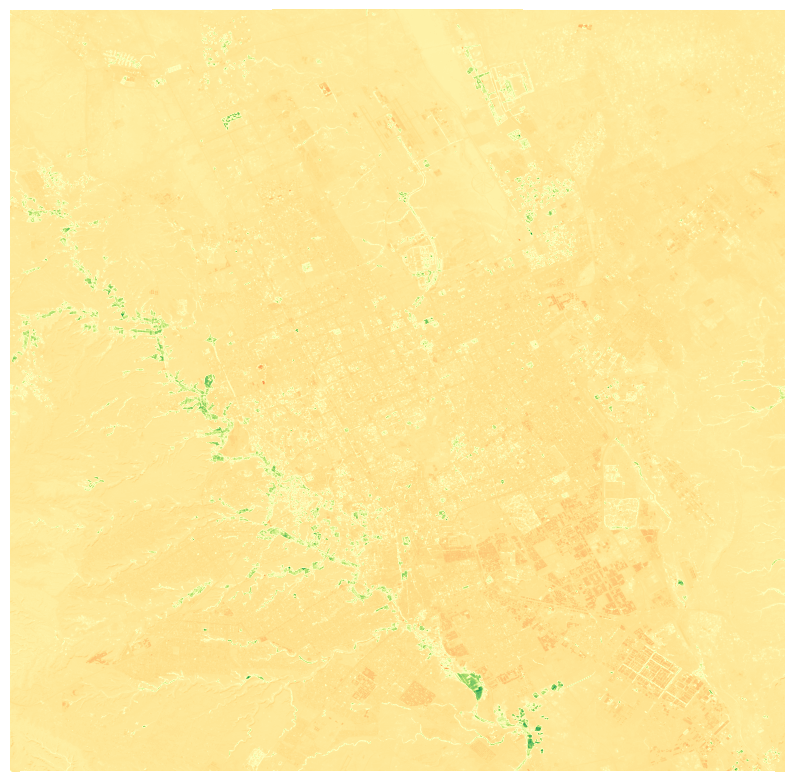

In [11]:
def read_band(band_number):
    band = ds.GetRasterBand(band_number).ReadAsArray().astype(np.float32)
    return band

# Read the Red and NIR bands from the dataset
red = read_band(1)  # Assuming Band 4 is Red
nir = read_band(2)  # Assuming Band 8 is NIR

# Calculate NDVI
ndvi = (nir - red) / (nir + red)


# Plot NDVI
plt.figure(figsize=(10, 10))
plt.imshow(ndvi, cmap='RdYlGn')
#plt.colorbar(label='NDVI')
#plt.title('NDVI Image')
plt.axis('off')  # Turn off the axis
plt.show()

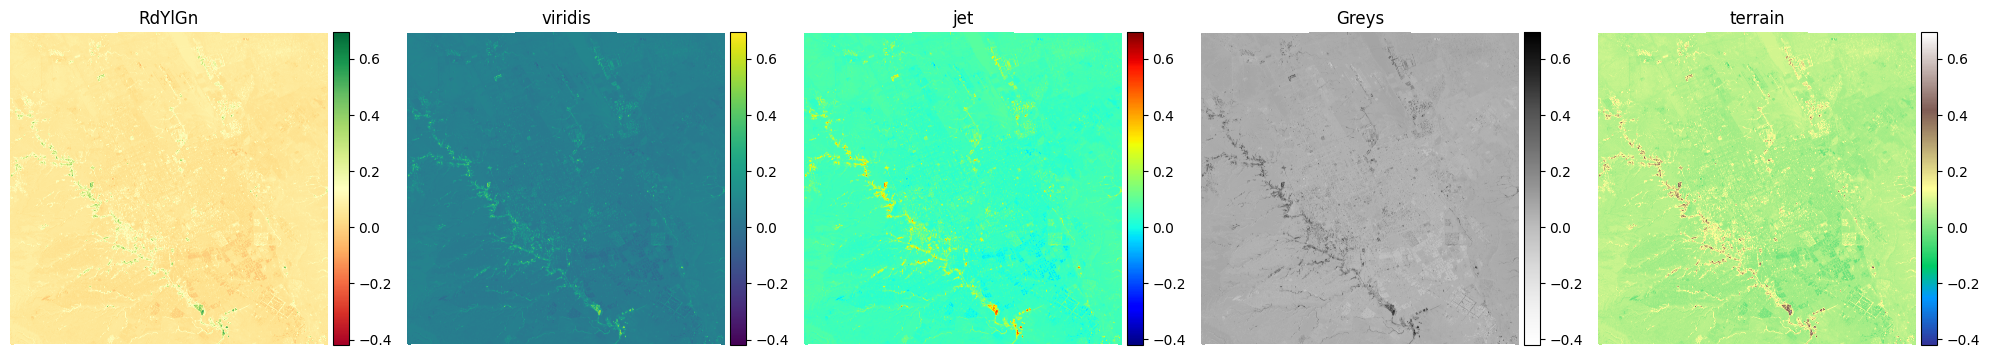

In [13]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def read_band(band_number):
    """Read a specific band from the dataset."""
    band = ds.GetRasterBand(band_number).ReadAsArray().astype(np.float32)
    return band

# Assuming Band 4 is Red and Band 5 (or another) is NIR
# Update band numbers according to your dataset's specific band ordering
red = read_band(1)  # Update the band number for Red
nir = read_band(2)  # Update the band number for NIR

# Calculate NDVI
ndvi = (nir - red) / (nir + red)

# Define colormaps to use
colormaps = ['RdYlGn', 'viridis', 'jet', 'Greys', 'terrain']

# Create a figure with 5 subplots for each colormap
fig, axes = plt.subplots(1, 5, figsize=(20, 8))

# Plot NDVI with each colormap
for ax, cmap in zip(axes, colormaps):
    im = ax.imshow(ndvi, cmap=cmap)
    ax.set_title(cmap)
    ax.axis('off')  # Remove axis ticks and labels

    # Add a colorbar to each subplot
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

plt.tight_layout()
plt.show()

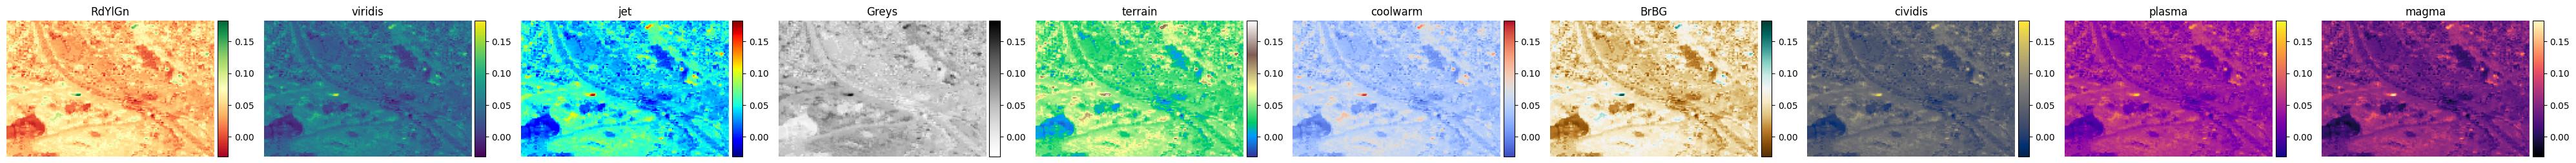

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Add 5 more colormaps to the existing list
colormaps.extend(['coolwarm', 'BrBG', 'cividis', 'plasma', 'magma'])

# Create a figure with 10 subplots (5 existing + 5 new) for each colormap
fig, axes = plt.subplots(1, 10, figsize=(40, 4))  # Adjusted for 10 subplots

# Plot NDVI with each colormap
for ax, cmap in zip(axes, colormaps):
    im = ax.imshow(ndvi, cmap=cmap)
    ax.set_title(cmap)
    ax.axis('off')  # Remove axis ticks and labels

    # Add a colorbar to each subplot
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

plt.tight_layout()
plt.show()


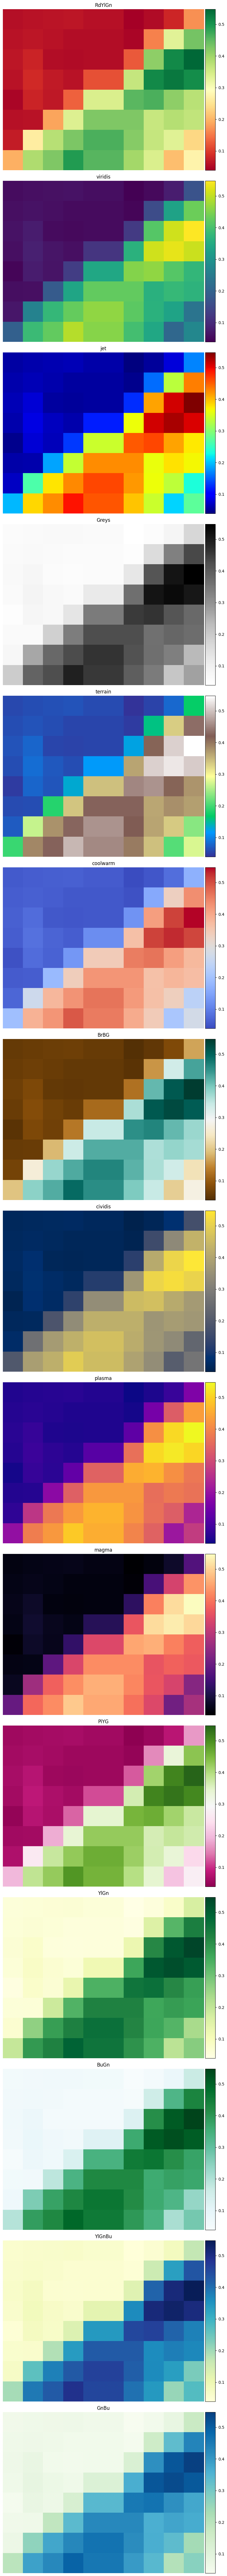

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

# Starting list of colormaps
colormaps = ['RdYlGn', 'viridis', 'jet', 'Greys', 'terrain',
             'coolwarm', 'BrBG', 'cividis', 'plasma', 'magma',
             'PiYG', 'YlGn', 'BuGn', 'YlGnBu', 'GnBu']

# Number of colormaps dictates the number of subplots
n_colormaps = len(colormaps)
n_cols = 1  # Number of columns per row, set to 1 for one image per row
n_rows = n_colormaps  # One row for each colormap

# Create a figure with the calculated number of subplots (rows and columns)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 6 * n_rows))

# If there's only one column, axes might not be an array if n_rows is 1
if n_rows == 1:
    axes = [axes]  # Make it a list to keep the iteration below consistent

# Plot NDVI with each colormap
for ax, cmap in zip(axes, colormaps):
    im = ax.imshow(ndvi, cmap=cmap)
    ax.set_title(cmap)
    ax.axis('off')  # Remove axis ticks and labels

    # Add a colorbar to each subplot
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

plt.tight_layout()
plt.show()


In [ ]:
cluster_counts = [0, 0, 0, 0]

# Loop over each pixel in the NDVI array
for row in range(ndvi.shape[0]):  # Replace 121 with ndvi.shape[0] if it varies
    for col in range(ndvi.shape[1]):  # Replace 82 with ndvi.shape[1] if it varies
        value = ndvi[row, col]
        # Increment the appropriate counter based on the NDVI value
        if value > 0.66:
            cluster_counts[0] += 1
        elif value > 0.33:
            cluster_counts[1] += 1
        elif value > 0.01:
            cluster_counts[2] += 1
        else:
            cluster_counts[3] += 1

# Plotting
clusters = ['> 0.66', '0.33 - 0.66', '0.01 - 0.33', '<= 0.01']
plt.bar(clusters, cluster_counts, color=['green', 'yellow', 'orange', 'red'])
plt.title('NDVI Pixel Distribution Across Clusters')
plt.xlabel('Cluster Range')
plt.ylabel('Pixel Count')
plt.show()
print(cluster_counts)


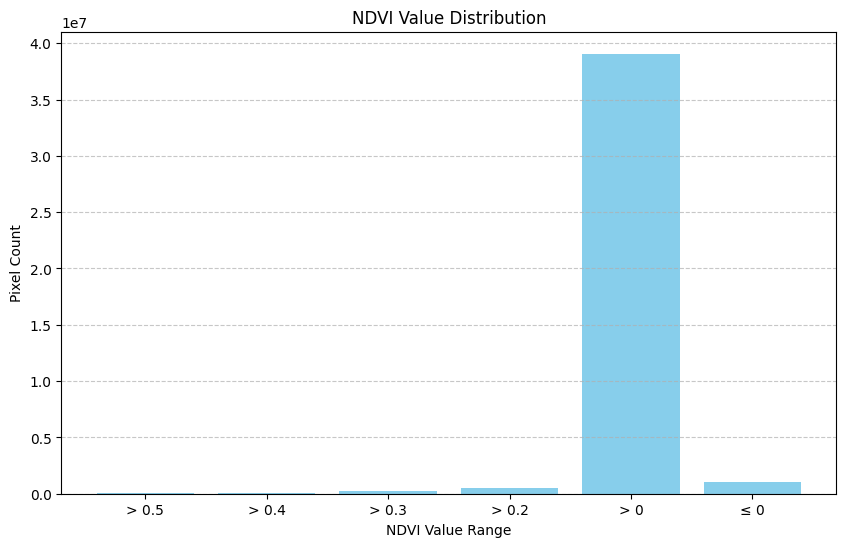

[22077, 91738, 231806, 470344, 39067659, 1009901]


In [14]:
cluster_counts = [0, 0, 0, 0,0,0]

# Loop over each pixel in the NDVI array
for row in range(ndvi.shape[0]):  # Replace 121 with ndvi.shape[0] if it varies
    for col in range(ndvi.shape[1]):  # Replace 82 with ndvi.shape[1] if it varies
        value = ndvi[row, col]
        # Increment the appropriate counter based on the NDVI value
        if value > 0.5:
            cluster_counts[0] += 1
        elif value > 0.4:
            cluster_counts[1] += 1
        elif value >0.3:
            cluster_counts[2] += 1
        elif value >0.2:
            cluster_counts[3] += 1

        elif value > 0:
            cluster_counts[4] += 1
        else:
            cluster_counts[5] += 1

# Plotting the cluster counts
cluster_labels = ['> 0.5', '> 0.4', '> 0.3', '> 0.2', '> 0', '≤ 0']

plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, cluster_counts, color='skyblue')
plt.title('NDVI Value Distribution')
plt.xlabel('NDVI Value Range')
plt.ylabel('Pixel Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print(cluster_counts)

In [15]:
cluster_counts = [0, 0]

# Loop over each pixel in the NDVI array
for row in range(ndvi.shape[0]):  # Replace 121 with ndvi.shape[0] if it varies
    for col in range(ndvi.shape[1]):  # Replace 82 with ndvi.shape[1] if it varies
        value = ndvi[row, col]
        # Increment the appropriate counter based on the NDVI value
        if value > 0.22:
            cluster_counts[0] += 1
        else:
            cluster_counts[1] += 1

# Plotting the cluster counts
print(cluster_counts)

[685536, 40207989]


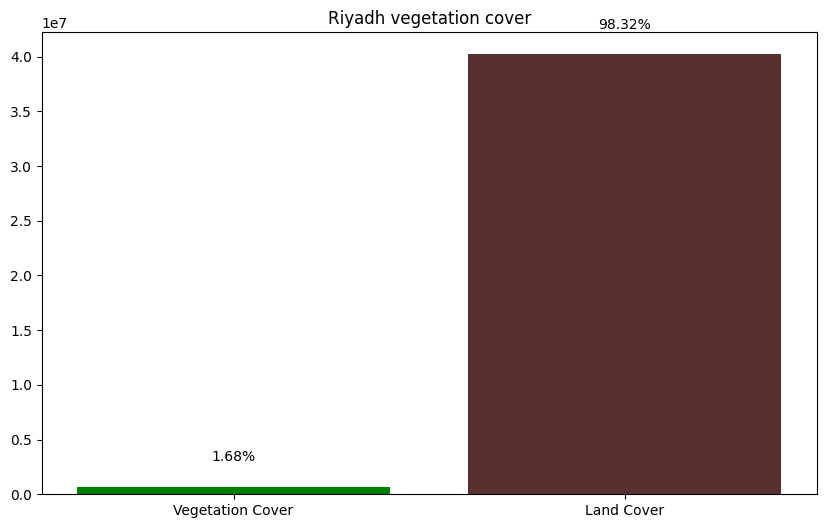

In [28]:

total_count = sum(cluster_counts)

# Calculating percentages for each cluster
percentages = [count / total_count * 100 for count in cluster_counts]

# Cluster labels
cluster_labels = ['Vegetation Cover', 'Land Cover']

# Colors for each cluster
colors = ['green', '#573130']

# Creating the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_labels, cluster_counts, color=colors)

# Adding title and labels
plt.title('Riyadh vegetation cover')
#plt.xlabel('Cluster Type')
#plt.ylabel('Pixel Count')

# Adding percentage annotations on each bar
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05 * total_count, f'{percentage:.2f}%', ha='center', va='bottom')

# Display the plot
plt.show()

# Display the plot
plt.show()

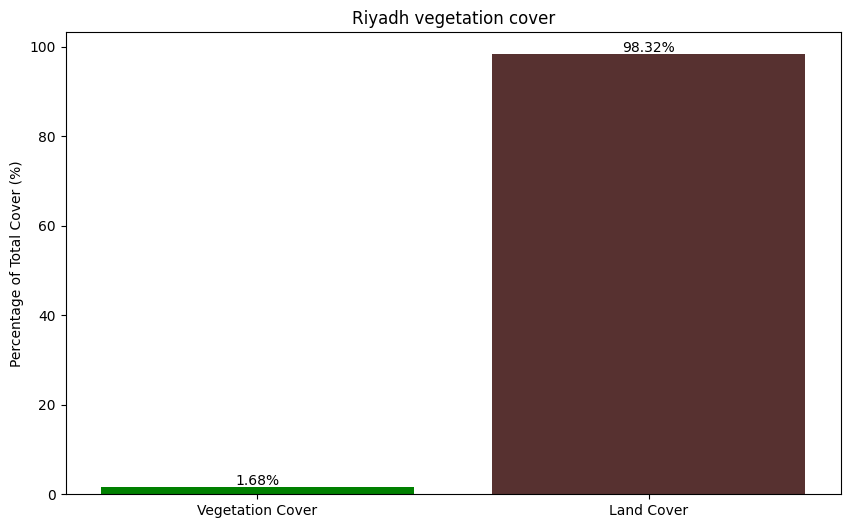

In [34]:

# Assuming 'cluster_counts' contains the counts for vegetation and land cover
total_count = sum(cluster_counts)
percentages = [(count / total_count) * 100 for count in cluster_counts]

# Cluster labels
cluster_labels = ['Vegetation Cover', 'Land Cover']

# Colors for each cluster
colors = ['green', '#573130']

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, percentages, color=colors)

# Adding title and labels
plt.title('Riyadh vegetation cover')
#plt.xlabel('Cluster Type')
plt.ylabel('Percentage of Total Cover (%)')

# Add percentage values above bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center')

# Display the plot
plt.show()

In [17]:
with open('UJ_values.csv', 'w') as file:
    # Write the header
    file.write("Row,Column,Value\n")
    
    # Loop over each pixel in the NDVI array
    for row in range(ndvi.shape[0]):
        for col in range(ndvi.shape[1]):
            value = ndvi[row, col]
            # Write the row, column, and pixel value to the file
            file.write(f"{row},{col},{value}\n")

print("Pixel values and positions have been saved to 'pixel_values.csv'.")

Pixel values and positions have been saved to 'pixel_values.csv'.


In [53]:
import pandas as pd
ds=pd.read_csv("D:\\owd1\\Documents\\GitHub-REPO\Senior-project\\Codes\\normal codes\\pixel_values.csv")
ds

Row  Column     Value
0       0       0  0.018642
1       0       1  0.004778
2       0       2 -0.015343
3       0       3 -0.036451
4       0       4 -0.049419
...   ...     ...       ...
9917   81     116 -0.012542
9918   81     117 -0.002854
9919   81     118  0.012365
9920   81     119  0.007927
9921   81     120  0.022445

[9922 rows x 3 columns]

In [ ]:
# Specify the path to your downloaded image
image_path = 'D:\\owd1\\Documents\\GitHub-REPO\\Senior-project\\Docs\\Row_Data\\UJ\\Sentinel2_Full_Image_AOI_Float.tif'

In [ ]:
# Open the image
ds = gdal.Open(image_path)

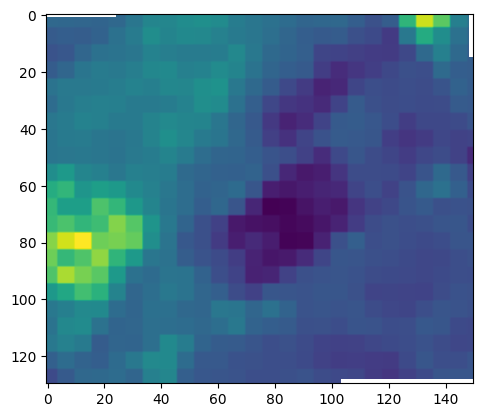

In [ ]:
band = ds.GetRasterBand(1)
array = band.ReadAsArray()
plt.figure()
plt.imshow(array)

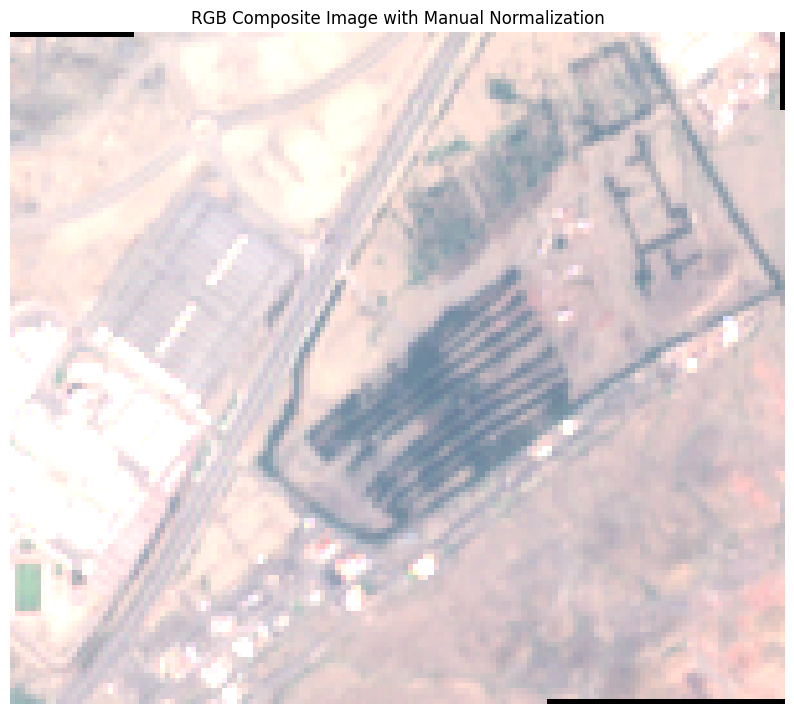

In [ ]:
# Function to normalize array based on a given min and max value for display
def manual_normalize(array, min_val, max_val):
    array = np.clip(array, min_val, max_val)  # Clip to the specified range
    return (array - min_val) / (max_val - min_val)  # Normalize to [0, 1]

# Get bands for Red, Green, and Blue
band_red = ds.GetRasterBand(4).ReadAsArray()
band_green = ds.GetRasterBand(3).ReadAsArray()
band_blue = ds.GetRasterBand(2).ReadAsArray()

# Manually set the min and max values for display range based on histogram inspection or domain knowledge
min_display_val = 1000  # Example value, adjust based on your data
max_display_val = 3000  # Example value, adjust based on your data

# Normalize bands with the manually set display range
n_band_red = manual_normalize(band_red, min_display_val, max_display_val)
n_band_green = manual_normalize(band_green, min_display_val, max_display_val)
n_band_blue = manual_normalize(band_blue, min_display_val, max_display_val)

# Stack bands
rgb = np.dstack((n_band_red, n_band_green, n_band_blue))

# Plotting
plt.figure(figsize=(10, 10))
plt.imshow(rgb)
plt.title('RGB Composite Image with Manual Normalization')
plt.axis('off')  # Turn off the axis
plt.show()

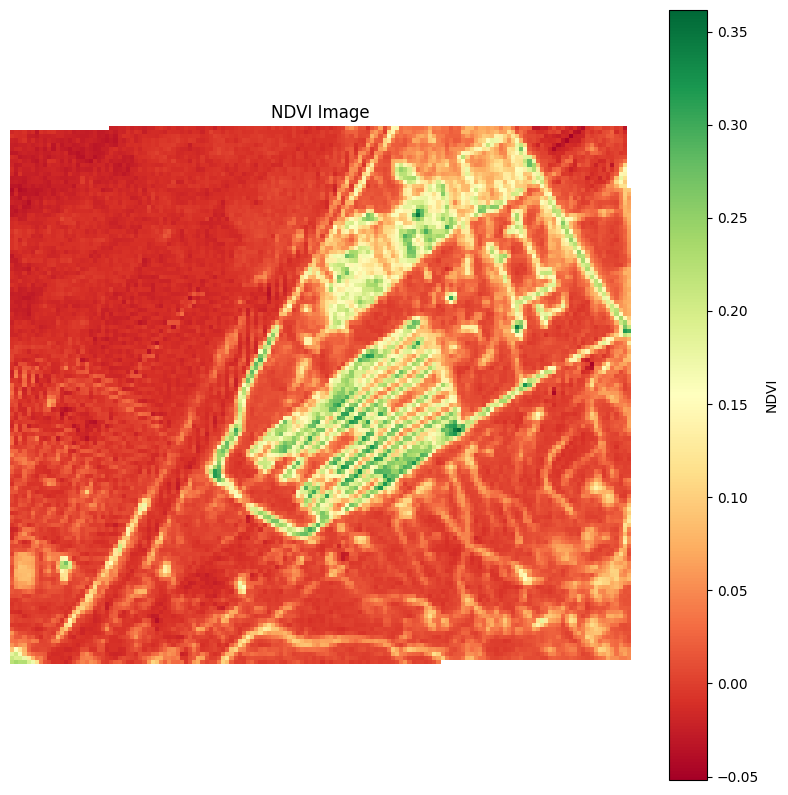

In [ ]:
def read_band(band_number):
    band = ds.GetRasterBand(band_number).ReadAsArray().astype(np.float32)
    return band

# Read the Red and NIR bands from the dataset
red = read_band(4)  # Assuming Band 4 is Red
nir = read_band(8)  # Assuming Band 8 is NIR

# Calculate NDVI
ndvi = (nir - red) / (nir + red)


# Plot NDVI
plt.figure(figsize=(10, 10))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('NDVI Image')
plt.axis('off')  # Turn off the axis
plt.show()